In [189]:
import pandas as pd
import plotly.express as px

In [190]:
data = pd.read_csv('historical_data.csv', parse_dates=['created_at','actual_delivery_time'])
# to_predict = pd.read_json('data_to_predict.json',lines=True)
# info = pd.read_table('data_description.txt')

In [191]:
# Duplicate loading of data for later use

raw = pd.read_csv('historical_data.csv', parse_dates=['created_at','actual_delivery_time'])

In [192]:
# Define a function to display the first 5 rows of a DataFrame

def display(i):
  return i.head(5)

In [193]:
display(data)

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  
0                                         861.0  
1                                         690.0  
2                                         690.0  
3                                         289.0  
4                                         650.0

In [194]:
# display(to_predict)

In [195]:
# info

In [196]:
# Calculate delivery duration in seconds

data['duration'] = (data['actual_delivery_time']-data['created_at']).dt.total_seconds()

In [197]:
# Check for missing values

data.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
duration                                            7
dtype: int64

In [198]:
# Remove rows with missing values

data.dropna(inplace=True)

In [199]:
# Display summary statistics

data.describe()

market_id                     created_at  \
count  175777.000000                         175777   
mean        2.743726  2015-02-04 19:57:50.009631744   
min         1.000000            2015-01-21 15:22:03   
25%         2.000000            2015-01-29 01:31:19   
50%         2.000000            2015-02-05 02:41:26   
75%         4.000000            2015-02-12 01:04:32   
max         6.000000            2015-02-18 06:00:44   
std         1.330963                            NaN   

                actual_delivery_time       store_id  order_protocol  \
count                         175777  175777.000000   175777.000000   
mean   2015-02-04 20:45:36.432303616    3556.299561        2.911752   
min              2015-01-21 16:16:34       1.000000        1.000000   
25%              2015-01-29 02:18:30    1703.000000        1.000000   
50%              2015-02-05 03:45:31    3620.000000        3.000000   
75%              2015-02-12 01:47:32    5341.000000        4.000000   
max              2015-02-19 22:45:31    6987.000000        7.000000   
std                              NaN    2055.959006        1.513128   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   
std         2.674055    1828.554893            1.625681      519.882924   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   
std        560.828571              34.544724           32.168505   

       total_outstanding_orders  estimated_order_place_duration  \
count             175777.000000                   175777.000000   
mean                  58.230115                      307.818105   
min                   -6.000000                        0.000000   
25%                   17.000000                      251.000000   
50%                   41.000000                      251.000000   
75%                   85.000000                      446.000000   
max                  285.000000                     2715.000000   
std                   52.731043                       89.796587   

       estimated_store_to_consumer_driving_duration       duration  
count                                 175777.000000  175777.000000  
mean                                     546.077240    2866.422672  
min                                        0.000000     101.000000  
25%                                      384.000000    2105.000000  
50%                                      544.000000    2662.000000  
75%                                      703.000000    3383.000000  
max                                     2088.000000  373879.000000  
std                                      218.717798    1660.741001

 `market_id`: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id

In [200]:
# Visualize the distribution of cities/regions (market_id)

market_id_distribution = px.bar(data.market_id.value_counts(), color=data.market_id.unique(), labels={'value': 'Count', 'index': 'Market ID'})
market_id_distribution.update_layout(title='Distribution of Cities/Regions (Market ID)')
market_id_distribution.show()

`order_protocol`: a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol

In [201]:
# Visualize the distribution of order protocols

order_protocol_distribution = px.bar(data.order_protocol.value_counts().sort_values(ascending=False), color=data.order_protocol.unique(), labels={'value': 'Count', 'index': 'Order Protocol'})
order_protocol_distribution.update_layout(title='Distribution of Order Protocols')
order_protocol_distribution.show()

`store_primary_category`: cuisine category of the restaurant, e.g., italian, asian

In [202]:
# Visualize the distribution of store primary categories

store_category_distribution = px.bar(data.store_primary_category.value_counts(), color=data.store_primary_category.unique(), labels={'value': 'Count', 'index': 'Store Primary Category'})
store_category_distribution.update_layout(title='Distribution of Store Primary Categories')
store_category_distribution.show()

In [203]:
# Visualize the distribution of deliveries by day of the week. The bar graph will provide clear information about the distribution of deliveries by day of the week.

delivery_day_distribution = px.bar(data.actual_delivery_time.dt.day_name().value_counts(), 
                                   color=data.actual_delivery_time.dt.day_name().unique(),
                                   labels={'value': 'Count', 'index': 'Day of the Week'})
delivery_day_distribution.update_layout(title='Distribution of Deliveries by Day of the Week')
delivery_day_distribution.show()

Days around weekends are the busiest with Saturdays having the most demand.

In [204]:
# Visualize the distribution of deliveries by month

delivery_month_distribution = px.bar(data.actual_delivery_time.dt.month_name().value_counts(), 
                                     color=data.actual_delivery_time.dt.month_name().unique(),
                                     labels={'value': 'Count', 'index': 'Month'})
delivery_month_distribution.update_layout(title='Distribution of Deliveries by Month')
delivery_month_distribution.show()


This will provide a bar graph showing the distribution of deliveries by month.

In [205]:
# Visualize the distribution of deliveries by day of the month
delivery_day_of_month_distribution = px.bar(data.actual_delivery_time.dt.day.value_counts(), 
                                            color=data.actual_delivery_time.dt.day.unique(),
                                            labels={'value': 'Count', 'index': 'Day of the Month'})
delivery_day_of_month_distribution.update_layout(title='Distribution of Deliveries by Day of the Month')
delivery_day_of_month_distribution.show()


We can see a seasonality trend with waves of demand going up on weekends. This will provide a bar graph showing the distribution of deliveries by day of the month with appropriate labels.

In [206]:
# Identify holidays within the data range

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [207]:
start = raw.created_at.dt.date.min()
end = raw.created_at.dt.date.max()
holidays = calendar().holidays(start=start, end=end, return_name=True)
print(f'Holidays in range ({start} - {end}):\n', holidays)


Holidays in range (2014-10-19 - 2015-02-18):
 2014-11-11                           Veterans Day
2014-11-27                       Thanksgiving Day
2014-12-25                          Christmas Day
2015-01-01                         New Year's Day
2015-01-19    Birthday of Martin Luther King, Jr.
2015-02-16                  Washington's Birthday
dtype: object


In [208]:
# Extend the date range for holiday detection

dates_with_margin = pd.date_range(
        start - pd.DateOffset(months=1),
        end + pd.DateOffset(months=4))

In [209]:
dates_with_margin

DatetimeIndex(['2014-09-19', '2014-09-20', '2014-09-21', '2014-09-22',
               '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
               '2014-09-27', '2014-09-28',
               ...
               '2015-06-09', '2015-06-10', '2015-06-11', '2015-06-12',
               '2015-06-13', '2015-06-14', '2015-06-15', '2015-06-16',
               '2015-06-17', '2015-06-18'],
              dtype='datetime64[ns]', length=273, freq='D')

In [210]:
# Get holidays within the extended date range

holidays = calendar().holidays(
    start=dates_with_margin.min(),
    end=dates_with_margin.max(), return_name=True)
holidays

2014-10-13                           Columbus Day
2014-11-11                           Veterans Day
2014-11-27                       Thanksgiving Day
2014-12-25                          Christmas Day
2015-01-01                         New Year's Day
2015-01-19    Birthday of Martin Luther King, Jr.
2015-02-16                  Washington's Birthday
2015-05-25                           Memorial Day
dtype: object

In [211]:
# Count the number of holidays

is_holiday = pd.Series(pd.Series(dates_with_margin).isin(holidays).values, index=dates_with_margin)
is_holiday.sum()

0

Less than 0.01% of deliveries were longer than 6 hours or 23369.4 seconds

In [212]:
# so we count them as outliers

data.duration.quantile(0.9999)/3600

6.491516444438813

In [213]:
# cleaning data

In [214]:
raw.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [215]:
# Identify outliers and clean the data
raw['duration'] = (raw.actual_delivery_time - raw.created_at).dt.total_seconds()

# date_outlier = pd.to_datetime('2014-12-31')
duration_outlier = 60*60*6  # 6 hours

Only 0.01% and less orders took more than 6 hours to deliver so we will treat them as outliers and remove them

In [216]:
# Remove outliers and rows with missing values in key columns
# cleaned_raw = raw[
#     raw.created_at > date_outlier
# ][
cleaned_raw = raw[raw.duration < duration_outlier
].dropna(how='any',
         subset=[
             'duration',
             'market_id',
             'store_primary_category',
             'order_protocol',
             'total_onshift_dashers',
             'total_busy_dashers',
             'total_outstanding_orders'
         ])

# Display the size difference before and after cleaning

print("Old dataset size: ", (raw.shape), "----->", "New dataset size: ", (cleaned_raw.shape))
cleaned_raw.head()


Old dataset size:  (197428, 17) -----> New dataset size:  (176225, 17)


market_id          created_at actual_delivery_time  store_id  \
0         1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1         2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
8         2.0 2015-02-16 00:11:35  2015-02-16 00:38:01      5477   
14        1.0 2015-02-12 03:36:46  2015-02-12 04:14:39      2841   
15        1.0 2015-01-27 02:12:36  2015-01-27 03:02:24      2841   

   store_primary_category  order_protocol  total_items  subtotal  \
0                american             1.0            4      3441   
1                 mexican             2.0            1      1900   
8                  indian             3.0            4      4771   
14                italian             1.0            1      1525   
15                italian             1.0            2      3620   

    num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                    4             557            1239                   33.0   
1                    1            1400            1400                    1.0   
8                    3             820            1604                    8.0   
14                   1            1525            1525                    5.0   
15                   2            1425            2195                    5.0   

    total_busy_dashers  total_outstanding_orders  \
0                 14.0                      21.0   
1                  2.0                       2.0   
8                  6.0                      18.0   
14                 6.0                       8.0   
15                 5.0                       7.0   

    estimated_order_place_duration  \
0                              446   
1                              446   
8                              446   
14                             446   
15                             446   

    estimated_store_to_consumer_driving_duration  duration  
0                                          861.0    3779.0  
1                                          690.0    4024.0  
8                                          289.0    1586.0  
14                                         795.0    2273.0  
15                                         205.0    2988.0

In [217]:
# Visualize the relationship between subtotal and delivery duration. 
# By plotting the frequency of delivery durations for each subtotal amount (in dollars), we can observe the typical or usual durations associated with different order subtotals.

cleaned_raw['subtotal_dollars'] = cleaned_raw['subtotal'] / 100 # Converting cents to dollar

cleaned_raw['duration_hours'] = cleaned_raw['duration'] / 3600 # Converting seconds to hours

subtotal_duration_relationship = px.scatter(cleaned_raw, x='subtotal_dollars', y='duration_hours', 
                                            labels={'subtotal_dollars': 'Subtotal ($)', 'duration_hours': 'Delivery Duration (in hours)'})
subtotal_duration_relationship.update_layout(title='Relationship between Subtotal(in dollars) and Delivery Duration')
subtotal_duration_relationship.show()

In [218]:
# Extract basic numerical features

basic_features  = cleaned_raw[[
    'total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'estimated_order_place_duration',
    'estimated_store_to_consumer_driving_duration',
    ]]

basic_features.head()

total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                    33.0                14.0                      21.0   
1                     1.0                 2.0                       2.0   
8                     8.0                 6.0                      18.0   
14                    5.0                 6.0                       8.0   
15                    5.0                 5.0                       7.0   

    estimated_order_place_duration  \
0                              446   
1                              446   
8                              446   
14                             446   
15                             446   

    estimated_store_to_consumer_driving_duration  
0                                          861.0  
1                                          690.0  
8                                          289.0  
14                                         795.0  
15                                         205.0

In [219]:
# One-hot encode categorical variables

alphabetic_col = cleaned_raw[[
    'market_id',
    'order_protocol',
    'store_primary_category'
]]

#display

alphabetic_col.head()

market_id  order_protocol store_primary_category
0         1.0             1.0               american
1         2.0             2.0                mexican
8         2.0             3.0                 indian
14        1.0             1.0                italian
15        1.0             1.0                italian

In [220]:
from sklearn.preprocessing import OneHotEncoder as ohe

encoder = ohe()
encoder.fit(alphabetic_col[['market_id', 'order_protocol', 'store_primary_category']])
encoded_column = encoder.transform(alphabetic_col[['market_id', 'order_protocol', 'store_primary_category']]).toarray()

print(encoded_column.shape)
encoded_values = pd.concat([pd.DataFrame(encoded_column, columns=encoder.get_feature_names_out(['market_id', 'order_protocol', 'store_primary_category']))], axis=1)
encoded_values.head()

# Merge encoded columns with basic features
encoded_table = pd.merge(basic_features, encoded_values, left_index=True, right_index=True, how='left')
encoded_table.head()
encoded_table.shape
encoded_table.head()

(176225, 86)


total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                    33.0                14.0                      21.0   
1                     1.0                 2.0                       2.0   
8                     8.0                 6.0                      18.0   
14                    5.0                 6.0                       8.0   
15                    5.0                 5.0                       7.0   

    estimated_order_place_duration  \
0                              446   
1                              446   
8                              446   
14                             446   
15                             446   

    estimated_store_to_consumer_driving_duration  ...  \
0                                          861.0  ...   
1                                          690.0  ...   
8                                          289.0  ...   
14                                         795.0  ...   
15                                         205.0  ...   

    store_primary_category_southern  store_primary_category_spanish  \
0                               0.0                             0.0   
1                               0.0                             0.0   
8                               0.0                             0.0   
14                              0.0                             0.0   
15                              0.0                             0.0   

    store_primary_category_steak  store_primary_category_sushi  \
0                            0.0                           0.0   
1                            0.0                           0.0   
8                            0.0                           0.0   
14                           0.0                           0.0   
15                           0.0                           0.0   

    store_primary_category_tapas  store_primary_category_thai  \
0                            0.0                          0.0   
1                            0.0                          0.0   
8                            0.0                          0.0   
14                           0.0                          0.0   
15                           0.0                          0.0   

    store_primary_category_turkish  store_primary_category_vegan  \
0                              0.0                           0.0   
1                              0.0                           0.0   
8                              0.0                           0.0   
14                             0.0                           0.0   
15                             0.0                           0.0   

    store_primary_category_vegetarian  store_primary_category_vietnamese  
0                                 0.0                                0.0  
1                                 0.0                                0.0  
8                                 0.0                                0.0  
14                                0.0                                0.0  
15                                0.0                                0.0  

[5 rows x 96 columns]

In [221]:
# merging encoded_column with cleaned_raw and not resetting the index. Calling it encoded_table

encoded_table = pd.merge(basic_features, encoded_values, left_index=True, right_index=True, how='left')

#display

print("Shape:", encoded_table.shape)
encoded_table.head()


Shape: (176225, 96)


total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                    33.0                14.0                      21.0   
1                     1.0                 2.0                       2.0   
8                     8.0                 6.0                      18.0   
14                    5.0                 6.0                       8.0   
15                    5.0                 5.0                       7.0   

    estimated_order_place_duration  \
0                              446   
1                              446   
8                              446   
14                             446   
15                             446   

    estimated_store_to_consumer_driving_duration  ...  \
0                                          861.0  ...   
1                                          690.0  ...   
8                                          289.0  ...   
14                                         795.0  ...   
15                                         205.0  ...   

    store_primary_category_southern  store_primary_category_spanish  \
0                               0.0                             0.0   
1                               0.0                             0.0   
8                               0.0                             0.0   
14                              0.0                             0.0   
15                              0.0                             0.0   

    store_primary_category_steak  store_primary_category_sushi  \
0                            0.0                           0.0   
1                            0.0                           0.0   
8                            0.0                           0.0   
14                           0.0                           0.0   
15                           0.0                           0.0   

    store_primary_category_tapas  store_primary_category_thai  \
0                            0.0                          0.0   
1                            0.0                          0.0   
8                            0.0                          0.0   
14                           0.0                          0.0   
15                           0.0                          0.0   

    store_primary_category_turkish  store_primary_category_vegan  \
0                              0.0                           0.0   
1                              0.0                           0.0   
8                              0.0                           0.0   
14                             0.0                           0.0   
15                             0.0                           0.0   

    store_primary_category_vegetarian  store_primary_category_vietnamese  
0                                 0.0                                0.0  
1                                 0.0                                0.0  
8                                 0.0                                0.0  
14                                0.0                                0.0  
15                                0.0                                0.0  

[5 rows x 96 columns]

####   Calender features

This function is used to create harmonic features such as sine and cosine components of various time-related attributes (day, week, month, etc.) along with holiday information, which can be used as additional features in time series analysis or machine learning models to capture temporal patterns such as:

- Seasonality
- Trend
- Irregularity
- Holidays

Identifying and understanding temporal patterns in data is crucial for various applications, including time series forecasting, anomaly detection, and decision-making. Analytical techniques such as time series analysis, machine learning models, and visualization tools are often used to uncover and interpret these patterns in temporal data.

In [222]:
# Create harmonic calendar features

import numpy as np

def harmonic_func(value, period):
  value *= 2 * np.pi / period
  return np.cos(value), np.sin(value)

df = pd.DataFrame(index=data.created_at.dt.normalize().unique())
df['cos_day'], df['sin_day'] = harmonic_func(df.index.day, df.index.days_in_month)
df['cos_week'], df['sin_week'] = harmonic_func(df.index.day_of_week, 7)
df['cos_month'], df['sin_month'] = harmonic_func(df.index.month, 12)
df['cos_quater'], df['sin_quater'] = harmonic_func(df.index.quarter, 4)
df['cos_year'], df['sin_year'] = harmonic_func(df.index.year, 365)
df.head(3)

df['is_holiday'] = df.index.isin(holidays)
dates_extended = pd.date_range(pd.to_datetime(df.index.min()) - pd.DateOffset(months=4), pd.to_datetime(df.index.max()) + pd.DateOffset(months=4))
holiday_ = calendar().holidays(start=dates_extended.min(), end=dates_extended.max())
df['is_holiday'] = df.index.isin(holiday_)
df.head()


cos_day   sin_day  cos_week  sin_week  cos_month  sin_month  \
2015-02-06  0.222521  0.974928 -0.900969 -0.433884   0.500000   0.866025   
2015-02-10 -0.623490  0.781831  0.623490  0.781831   0.500000   0.866025   
2015-02-16 -0.900969 -0.433884  1.000000  0.000000   0.500000   0.866025   
2015-02-12 -0.900969  0.433884 -0.900969  0.433884   0.500000   0.866025   
2015-01-27  0.688967 -0.724793  0.623490  0.781831   0.866025   0.500000   

              cos_quater  sin_quater  cos_year  sin_year  is_holiday  
2015-02-06  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-02-10  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-02-16  6.123234e-17         1.0 -0.991677 -0.128748        True  
2015-02-12  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-01-27  6.123234e-17         1.0 -0.991677 -0.128748       False

Holiday Identification: The code aims to identify holidays within a dataset and create a binary indicator (is_holiday) to mark whether each date is a holiday or not.

Holiday Calculation:

- It creates an extended date range by adding 4 months before and after the minimum and maximum dates found in the dataset.
- It calculates the holidays within this extended date range using the USFederalHolidayCalendar.

DataFrame Update:

- Initially, it assigns boolean values to the is_holiday column based on whether each date in the dataset is present in the list of holidays.
- Then, it updates the is_holiday column again based on the holidays calculated within the extended date range. This ensures that all potential holidays within the dataset's time frame are correctly identified.

Data Inspection: 

Finally, it displays the updated DataFrame to verify that the is_holiday column reflects the correct holiday status for each date.

In summary, this code segment provides a systematic approach to identifying holidays within a dataset and updating a corresponding binary indicator column to capture this information. It ensures that holidays are correctly identified even when they fall outside the original date range of the dataset.

In [223]:

df['is_holiday'] = df.index.isin(holidays)
dates_extended = pd.date_range(pd.to_datetime(df.index.min()) - pd.DateOffset(months=4), pd.to_datetime(df.index.max()) + pd.DateOffset(months=4))
holiday_ = calendar().holidays(start=dates_extended.min(), end=dates_extended.max())
df['is_holiday'] = df.index.isin(holiday_)
print(df.shape)
df.head()


(29, 11)


cos_day   sin_day  cos_week  sin_week  cos_month  sin_month  \
2015-02-06  0.222521  0.974928 -0.900969 -0.433884   0.500000   0.866025   
2015-02-10 -0.623490  0.781831  0.623490  0.781831   0.500000   0.866025   
2015-02-16 -0.900969 -0.433884  1.000000  0.000000   0.500000   0.866025   
2015-02-12 -0.900969  0.433884 -0.900969  0.433884   0.500000   0.866025   
2015-01-27  0.688967 -0.724793  0.623490  0.781831   0.866025   0.500000   

              cos_quater  sin_quater  cos_year  sin_year  is_holiday  
2015-02-06  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-02-10  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-02-16  6.123234e-17         1.0 -0.991677 -0.128748        True  
2015-02-12  6.123234e-17         1.0 -0.991677 -0.128748       False  
2015-01-27  6.123234e-17         1.0 -0.991677 -0.128748       False

In [224]:
# Merge calendar features with the cleaned dataset

calender_features = pd.DataFrame({'normalized_date': cleaned_raw.created_at.dt.normalize()}, index=cleaned_raw.index) \
        .merge(df.fillna(0), left_on='normalized_date', right_index=True) \
        .drop(columns=['normalized_date'])

print(calender_features.shape)
calender_features.head()

(176225, 11)


cos_day   sin_day  cos_week  sin_week  cos_month  sin_month  \
0    0.222521  0.974928 -0.900969 -0.433884        0.5   0.866025   
16   0.222521  0.974928 -0.900969 -0.433884        0.5   0.866025   
51   0.222521  0.974928 -0.900969 -0.433884        0.5   0.866025   
72   0.222521  0.974928 -0.900969 -0.433884        0.5   0.866025   
121  0.222521  0.974928 -0.900969 -0.433884        0.5   0.866025   

       cos_quater  sin_quater  cos_year  sin_year  is_holiday  
0    6.123234e-17         1.0 -0.991677 -0.128748       False  
16   6.123234e-17         1.0 -0.991677 -0.128748       False  
51   6.123234e-17         1.0 -0.991677 -0.128748       False  
72   6.123234e-17         1.0 -0.991677 -0.128748       False  
121  6.123234e-17         1.0 -0.991677 -0.128748       False

The code below generates harmonic features based on the time of day (measured in minutes) using a harmonic function. These features capture the cyclic nature of time, allowing for the representation of periodic patterns in the data.

In [225]:
# Generate time-based harmonic features

# calculates the total time of the day in minutes, considering both the hour and minute components of the created_at timestamp
min_cos, min_sin = harmonic_func(cleaned_raw.created_at.dt.hour*60 + cleaned_raw.created_at.dt.minute, 24*60*60)

time_features = pd.DataFrame({'min_cos': min_cos, 'min_sin': min_sin}, index=cleaned_raw.index)
time_features.head()


min_cos   min_sin
0   0.995227  0.097583
1   0.995473  0.095049
8   1.000000  0.000800
14  0.999877  0.015707
15  0.999954  0.009599

In [229]:
# Combine all features into a single DataFrame

features = pd.concat([basic_features, encoded_table, calender_features, time_features], axis=1)
display(features)


total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                    33.0                14.0                      21.0   
1                     1.0                 2.0                       2.0   
8                     8.0                 6.0                      18.0   
14                    5.0                 6.0                       8.0   
15                    5.0                 5.0                       7.0   

    estimated_order_place_duration  \
0                              446   
1                              446   
8                              446   
14                             446   
15                             446   

    estimated_store_to_consumer_driving_duration  ...  sin_week  cos_month  \
0                                          861.0  ... -0.433884   0.500000   
1                                          690.0  ...  0.781831   0.500000   
8                                          289.0  ...  0.000000   0.500000   
14                                         795.0  ...  0.433884   0.500000   
15                                         205.0  ...  0.781831   0.866025   

    sin_month    cos_quater  sin_quater  cos_year  sin_year  is_holiday  \
0    0.866025  6.123234e-17         1.0 -0.991677 -0.128748       False   
1    0.866025  6.123234e-17         1.0 -0.991677 -0.128748       False   
8    0.866025  6.123234e-17         1.0 -0.991677 -0.128748        True   
14   0.866025  6.123234e-17         1.0 -0.991677 -0.128748       False   
15   0.500000  6.123234e-17         1.0 -0.991677 -0.128748       False   

     min_cos   min_sin  
0   0.995227  0.097583  
1   0.995473  0.095049  
8   1.000000  0.000800  
14  0.999877  0.015707  
15  0.999954  0.009599  

[5 rows x 119 columns]

In [234]:
# Removing duplicate columns in features

features = features.loc[:,~features.columns.duplicated()]
display(features)

total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0             4      3441                   4             557            1239   
1             1      1900                   1            1400            1400   
8             4      4771                   3             820            1604   
14            1      1525                   1            1525            1525   
15            2      3620                   2            1425            2195   

    total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                    33.0                14.0                      21.0   
1                     1.0                 2.0                       2.0   
8                     8.0                 6.0                      18.0   
14                    5.0                 6.0                       8.0   
15                    5.0                 5.0                       7.0   

    estimated_order_place_duration  \
0                              446   
1                              446   
8                              446   
14                             446   
15                             446   

    estimated_store_to_consumer_driving_duration  ...  sin_week  cos_month  \
0                                          861.0  ... -0.433884   0.500000   
1                                          690.0  ...  0.781831   0.500000   
8                                          289.0  ...  0.000000   0.500000   
14                                         795.0  ...  0.433884   0.500000   
15                                         205.0  ...  0.781831   0.866025   

    sin_month    cos_quater  sin_quater  cos_year  sin_year  is_holiday  \
0    0.866025  6.123234e-17         1.0 -0.991677 -0.128748       False   
1    0.866025  6.123234e-17         1.0 -0.991677 -0.128748       False   
8    0.866025  6.123234e-17         1.0 -0.991677 -0.128748        True   
14   0.866025  6.123234e-17         1.0 -0.991677 -0.128748       False   
15   0.500000  6.123234e-17         1.0 -0.991677 -0.128748       False   

     min_cos   min_sin  
0   0.995227  0.097583  
1   0.995473  0.095049  
8   1.000000  0.000800  
14  0.999877  0.015707  
15  0.999954  0.009599  

[5 rows x 109 columns]

In [235]:
# Target
target = cleaned_raw.reindex(columns=['duration'])
target.head(3)

duration
0    3779.0
1    4024.0
8    1586.0

In [236]:
# save the prepared dataset

dataset = pd.concat([features,target],axis=1)
dataset.head(3)

total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
8            4      4771                   3             820            1604   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   33.0                14.0                      21.0   
1                    1.0                 2.0                       2.0   
8                    8.0                 6.0                      18.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
8                             446   

   estimated_store_to_consumer_driving_duration  ...  cos_month  sin_month  \
0                                         861.0  ...        0.5   0.866025   
1                                         690.0  ...        0.5   0.866025   
8                                         289.0  ...        0.5   0.866025   

     cos_quater  sin_quater  cos_year  sin_year  is_holiday   min_cos  \
0  6.123234e-17         1.0 -0.991677 -0.128748       False  0.995227   
1  6.123234e-17         1.0 -0.991677 -0.128748       False  0.995473   
8  6.123234e-17         1.0 -0.991677 -0.128748        True  1.000000   

    min_sin  duration  
0  0.097583    3779.0  
1  0.095049    4024.0  
8  0.000800    1586.0  

[3 rows x 110 columns]

In [96]:
# Saving the csv file in my drive

# dataset.to_csv('/content/drive/My Drive/cleaned_data_new.csv')


In [240]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import xgboost
from sklearn.metrics import mean_squared_error, mean_absolute_error

cleaned_df = dataset

cleaned_df.reset_index(drop=True)
print(cleaned_df.index.duplicated().any())

# create a dataframe y that takes duration from clean_df and reindex it
y = cleaned_df['duration'].to_frame()
y = y.reset_index(drop=True)
assert y.isnull().any().any() == False
y

x = cleaned_df.drop(columns=['duration'])
x = x.reset_index(drop=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=2)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)
cleaned_df = cleaned_df.reset_index(drop=True)
display(cleaned_df)


False
(140980, 109)
(35245, 109)
(140980, 1)
(35245, 1)


total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            4      4771                   3             820            1604   
3            1      1525                   1            1525            1525   
4            2      3620                   2            1425            2195   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   33.0                14.0                      21.0   
1                    1.0                 2.0                       2.0   
2                    8.0                 6.0                      18.0   
3                    5.0                 6.0                       8.0   
4                    5.0                 5.0                       7.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  ...  cos_month  sin_month  \
0                                         861.0  ...   0.500000   0.866025   
1                                         690.0  ...   0.500000   0.866025   
2                                         289.0  ...   0.500000   0.866025   
3                                         795.0  ...   0.500000   0.866025   
4                                         205.0  ...   0.866025   0.500000   

     cos_quater  sin_quater  cos_year  sin_year  is_holiday   min_cos  \
0  6.123234e-17         1.0 -0.991677 -0.128748       False  0.995227   
1  6.123234e-17         1.0 -0.991677 -0.128748       False  0.995473   
2  6.123234e-17         1.0 -0.991677 -0.128748        True  1.000000   
3  6.123234e-17         1.0 -0.991677 -0.128748       False  0.999877   
4  6.123234e-17         1.0 -0.991677 -0.128748       False  0.999954   

    min_sin  duration  
0  0.097583    3779.0  
1  0.095049    4024.0  
2  0.000800    1586.0  
3  0.015707    2273.0  
4  0.009599    2988.0  

[5 rows x 110 columns]

This code segment trains an XGBoost regressor model to predict a target variable (y) using a set of basic features extracted from the dataset (cleaned_df). Here's a concise summary:

- Feature Selection: Basic features related to the order and delivery process are selected from the dataset.

- Data Splitting: The data is split into training and testing sets, with 20% of the data reserved for testing.

- Handling Missing Values: Missing values in the features are filled with zeros to prepare the data for training.

- Model Training: An XGBoost regressor model is trained using the training features and target.

- Model Evaluation: The trained model is evaluated on the testing set using root mean squared error (RMSE) and mean absolute error (MAE) as evaluation metrics.

- Training Visualization: The training history, including RMSE and MAE, is plotted to visualize the model's performance over training iterations.

Overall, this code segment represents a typical workflow for training a machine learning model, including data preparation, model training, and evaluation.

In [242]:
basic_features_x = cleaned_df[['total_items',
    'subtotal',
    'num_distinct_items',
    'min_item_price',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'estimated_order_place_duration',
    'estimated_store_to_consumer_driving_duration']]
basic_features_x.head(5)

basic_x_train, basic_x_test, basic_y_train, basic_y_test = train_test_split(basic_features_x, y, test_size=.2, shuffle=True, random_state=2)
basic_x_train = basic_x_train.fillna(0)
basic_x_test = basic_x_test.fillna(0)
for i in [basic_x_train, basic_y_train, basic_x_test, basic_y_test]:
  print(i.shape)

basic_x_train.columns

model = xgboost.XGBRegressor()
history = model.fit(
    basic_x_train, basic_y_train,
    eval_set=[(basic_x_test, basic_y_test)],
    eval_metric=['rmse', 'mae'],
    verbose=0,
    early_stopping_rounds=10)


(140980, 10)
(140980, 1)
(35245, 10)
(35245, 1)


/Users/danny/opt/anaconda3/envs/shannon3/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/Users/danny/opt/anaconda3/envs/shannon3/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



<Axes: >

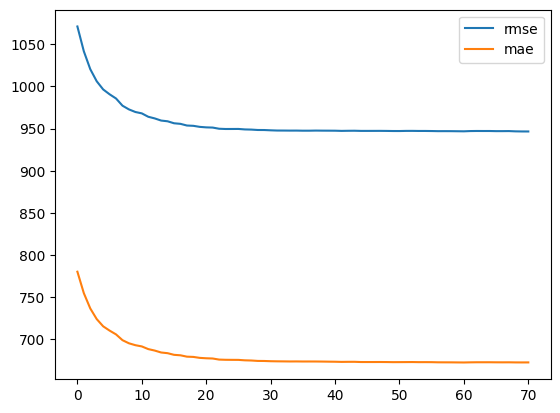

In [243]:
pd.DataFrame(history.evals_result()['validation_0']).plot()

In [256]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [261]:
# model = xgboost.XGBRegressor(verbose=0, use_label_encoder =False)
# params={
#     'booster': ['gbtree'], #['dart'] - best but shap not supported, #['gbtree', 'gblinear', 'dart'],
#     'objective': ['reg:gamma'], #['reg:squarederror', 'reg:squaredlogerror', 'reg:logistic', 'reg:gamma'],
#     'max_depth': [7], #[3, 4, 5, 6, 7, 10, 15], #--
#     'learning_rate': [0.05, 0.1, 0.15], 
#     'n_estimators': [300, 350, 400],
# #     'min_child_weight': [1, 10], #++
# #     'colsample_bytree': [0.8],
# #     'subsample': [0.75],
# #     'reg_alpha': [0],
# #     'reg_lambda': [2],
# #     'gamma' : [0],
# }
# cv = KFold(5, shuffle=True, random_state=2)
# rs = GridSearchCV(
#     model,
#     params,
#     cv=cv,
#     scoring="neg_mean_squared_error",
#     n_jobs=5,
#     verbose=False)

# rs.fit(
#     x,
#     y,
#     verbose=False)

In [259]:
print('best params:', rs.best_params_)

best params: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 350, 'objective': 'reg:gamma'}


In [262]:
# best params: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 350, 'objective': 'reg:gamma'}
best_params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'max_depth': 7,
    'learning_rate': 0.1,
    'n_estimators': 350,
    'verbose':0
}

In [263]:
model = xgboost.XGBRegressor(**best_params)
history = model.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    eval_metric=['mae', 'rmse'],
    verbose = 0,
    early_stopping_rounds=int(best_params.get('n_estimators', 100) * 0.1))

<Axes: >

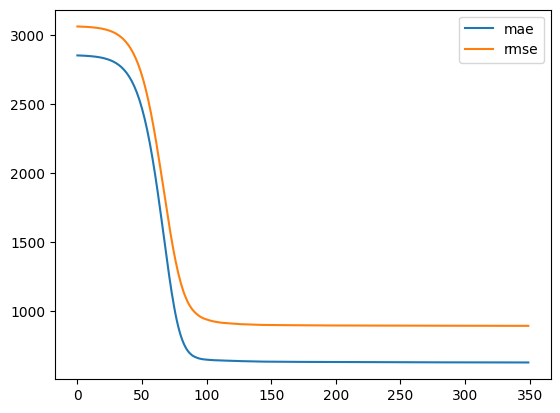

In [264]:
pd.DataFrame(history.evals_result()['validation_0']).plot()

In [274]:
# Using metrics like RMSE, MAE to see model accuracy

y_true = y_test
y_pred = model.predict(x_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))
print('MAE: ', mean_absolute_error(y_true, y_pred))

RMSE:  891.9523168810765
MAE:  626.6905094271739


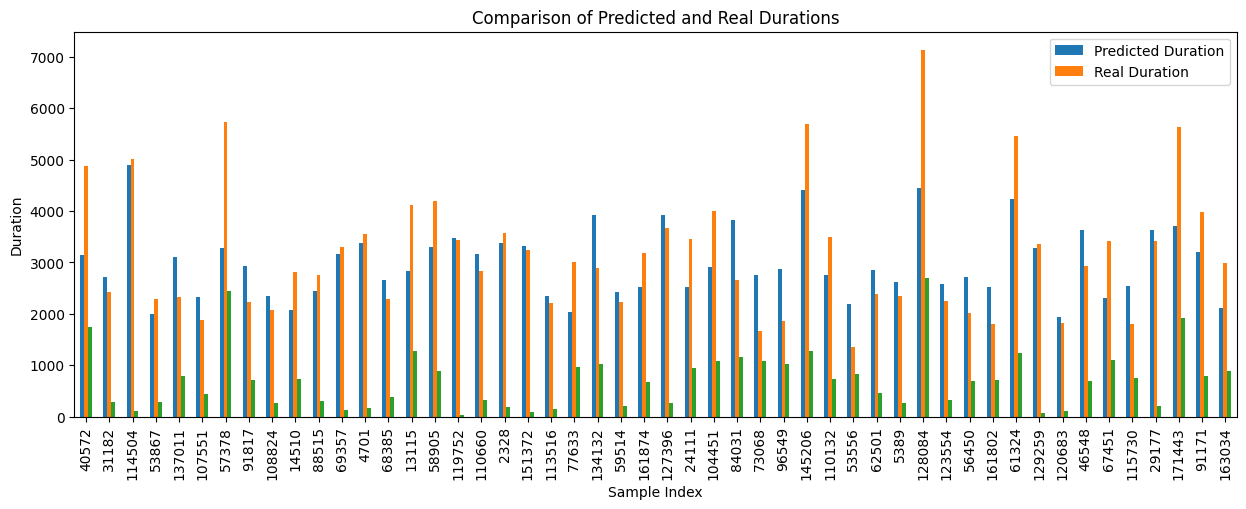

In [273]:
# Plotting to see model performance

import matplotlib.pyplot as plt

# Plotting the first 50 samples
plot_data = pd.DataFrame({
    'pred': y_pred,
    'real': y_true.duration,
    'diff': (y_pred - y_true.duration).abs(),
}).iloc[:50]

plot_data.plot.bar(y=['pred', 'real', 'diff'], figsize=(15, 5))
plt.xlabel('Sample Index')
plt.ylabel('Duration')
plt.title('Comparison of Predicted and Real Durations')
plt.legend(['Predicted Duration', 'Real Duration'])
plt.show()

Conclusion:

The regression model performed reasonably well, with an RMSE of 891.95 and an MAE of 626.69. These values indicate that, on average, the model's predictions deviated by approximately 891.95 units and 626.69 units, respectively, from the actual values. 

Overall, while the model shows decent performance, there is room for improvement through further optimization and feature engineering.